 classifying images of cats and dogs using a
 Convolutional Neural Network

In [1]:
#Install and Import Libraries

import os
import zipfile
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2025-10-17 09:52:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.207, 192.178.219.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   203MB/s    in 0.3s    

2025-10-17 09:52:07 (203 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
print(f"Total training cat images: {len(os.listdir(train_cats_dir))}")
print(f"Total training dog images: {len(os.listdir(train_dogs_dir))}")
print(f"Total validation cat images: {len(os.listdir(validation_cats_dir))}")
print(f"Total validation dog images: {len(os.listdir(validation_dogs_dir))}")


Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


In [8]:
##Data Augmentation and Preprocessing

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
# Note that the validation data should not be augmented, only rescaled
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'  # binary because we have two classes
)

# Flow validation images in batches of 20 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
##Build the CNN Model

model = Sequential([
    # First Conv-Pool Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    # Second Conv-Pool Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third Conv-Pool Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Fourth Conv-Pool Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the 3D output to 1D
    Flatten(),

    # Fully Connected Layer
    Dense(512, activation='relu'),

    # Output Layer
    Dense(1, activation='sigmoid')  # sigmoid for binary classification
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
##Compile and Train the Model

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), # Using RMSprop as it's often better than SGD for this type of problem
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 2000 images / 20 batch size = 100 steps
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,  # 1000 images / 20 batch size = 50 steps
    verbose=1
)

print("Model training complete!")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.5227 - loss: 0.7105 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.5117 - loss: 0.6930 - val_accuracy: 0.5500 - val_loss: 0.6830
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.5702 - loss: 0.6812 - val_accuracy: 0.5790 - val_loss: 0.6764
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.6009 - loss: 0.6757 - val_accuracy: 0.6490 - val_loss: 0.6266
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.6305 - loss: 0.6342 - val_accuracy: 0.6430 - val_loss: 0.6249
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6264 - loss: 0.6344 - val_accuracy: 0.6750 - val_loss: 0.5758
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6267 - loss: 0.6551 - val_accuracy: 0.7110 - val_loss: 0.5744
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6827 - loss: 0.6038 - val_accu

In [12]:
##Evaluate the Model

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

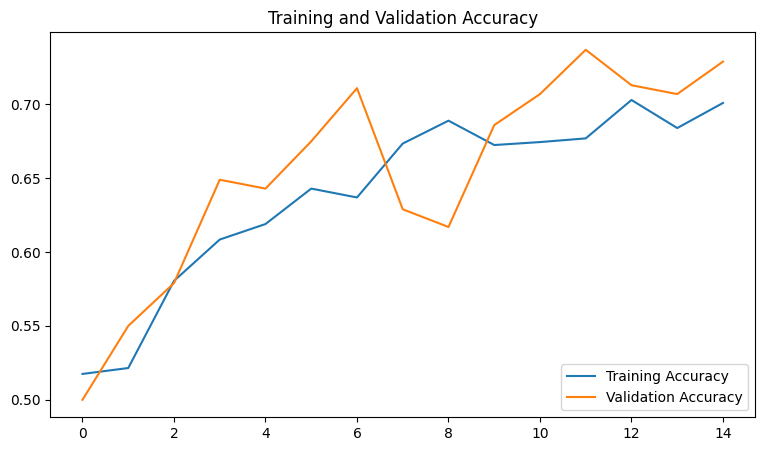

In [18]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

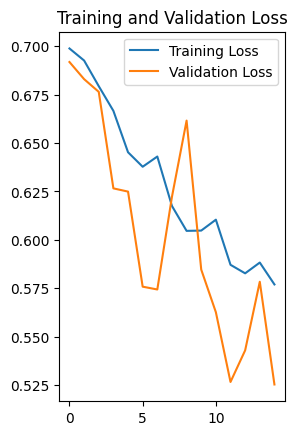

Evaluation plots generated successfully!


In [19]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("Evaluation plots generated successfully!")

This behavior indicates that the model is overfitting after a certain number of epochs. It has become too specialized to the training data and is no longer able to generalize to new, unseen images effectively. This is why the validation accuracy and loss plots stop improving even as the training plots continue to get better. Based on this observation, the ideal number of epochs for this model and dataset would be around 10 to 15, right before the validation accuracy peaks and the validation loss starts to climb.

In [20]:
##Make Predictions on a New Image

# Function to predict a single image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)

    if prediction[0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")

    print(f"Prediction score: {prediction[0][0]:.4f}")


few of the predictions based on the training and testing data

In [26]:
print("\n--- Predicting on a new image (Dog) ---")
predict_image('/content/cat1.webp')


--- Predicting on a new image (Dog) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: Cat
Prediction score: 0.2997


In [29]:
print("--- Predicting on a new image (Cat) ---")
predict_image('/content/cat3.jpeg')

--- Predicting on a new image (Cat) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: Dog
Prediction score: 0.6885


In [24]:
print("--- Predicting on a new image (Cat) ---")
predict_image('/content/dog2.jpeg')

--- Predicting on a new image (Cat) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: Dog
Prediction score: 0.8785


In [25]:
print("--- Predicting on a new image (Cat) ---")
predict_image('/content/dog3.jpeg')

--- Predicting on a new image (Cat) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction: Dog
Prediction score: 0.9323


--- Evaluating on Test Set ---
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 307ms/step - accuracy: 0.7305 - loss: 0.5346

Final Test Loss: 0.5253
Final Test Accuracy: 0.7290
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 306ms/step

--- Detailed Classification Report ---
              precision    recall  f1-score   support

        cats       0.49      0.44      0.46       500
        dogs       0.49      0.55      0.52       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



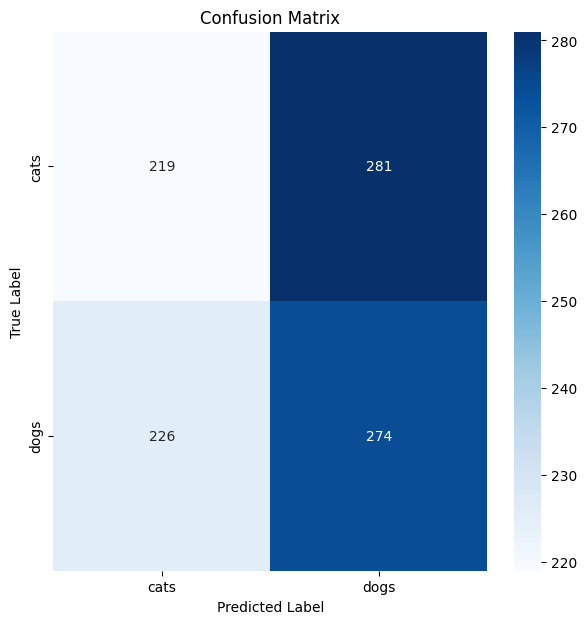

In [31]:
# Assuming 'model' is your trained CNN and 'test_generator' is set up
# with shuffle=False and batch_size=1 (important for evaluation metrics)

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Calculate Final Loss and Accuracy ---

print("--- Evaluating on Test Set ---")
# Use the evaluate function to get the final loss and accuracy directly
# Use the existing validation_generator as the test_generator for evaluation
test_generator = validation_generator # Rename validation_generator to test_generator for clarity

loss, accuracy = model.evaluate(test_generator, steps=len(test_generator), verbose=1)

print(f"\nFinal Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")

# --- 2. Generate Predictions and Metrics ---

# Reset the generator to ensure predictions match true labels order
test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert probabilities (from sigmoid activation) to class labels (0 or 1)
# 0.5 is the standard threshold for binary classification
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Get true labels and class names
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# --- 3. Print Classification Report (Accuracy, Precision, Recall, F1-Score) ---
print("\n--- Detailed Classification Report ---")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# --- 4. Visualize Confusion Matrix ---
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The Model accuracy can be seen around 72 percent, we can improve the model by using more data